## Unsepervised Learning
- K means Algorithm
- Hiearichal Clustering
- DBScan Clustering
- Silhoute Scoring

# Mathematical Intuition behind K-means

### K-means is a popular clustering algorithm used in unsupervised machine learning. Its goal is to partition a given dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively minimizes the within-cluster sum of squares, also known as inertia or distortion.

The intuition behind the K-means algorithm is based on two key ideas:

- `Centroid as representative`: The algorithm assumes that each cluster can be represented by its centroid, which is the mean of all the data points assigned to that cluster. The centroid acts as a representative or central point of the cluster.

- `Distance minimization`: K-means aims to minimize the distance between each data point and the centroid of the cluster it belongs to. The distance metric commonly used is the Euclidean distance, although other distance measures can also be employed.

The algorithm proceeds as follows:

- `Initialization`: Randomly initialize K centroids in the feature space. These centroids serve as the initial representatives of the clusters.


- `Assignment`: For each data point, calculate its distance to each centroid and assign it to the cluster with the nearest centroid.

- `Update`: Recalculate the centroids of each cluster by computing the mean of all the data points assigned to that cluster.

- `Iteration`: Repeat steps 2 and 3 until convergence. Convergence is typically reached when the assignments of data points to clusters no longer change significantly, or when a maximum number of iterations is reached.

The algorithm converges to a local optimum, meaning that it may not find the globally optimal solution. The final clustering result can depend on the initial random centroid initialization. To mitigate this, the algorithm is often run multiple times with different initializations, and the clustering with the lowest distortion is chosen.

Overall, the K-means algorithm tries to find cluster assignments and centroids that minimize the sum of squared distances between data points and their assigned centroids. By iteratively updating the centroids and reassigning data points, it converges to a partitioning of the dataset into K clusters.

##  Mathematical Intution Behind Kmeans

 Let's start with a mathematical explanation of the K-means algorithm and then provide a Python implementation.

K-means is an unsupervised machine learning algorithm used for clustering. Given a dataset with N data points, the algorithm aims to partition the data into K distinct clusters based on their feature similarity. The steps of the K-means algorithm are as follows:

- `Initialization`: Randomly select K points from the dataset as the initial cluster centroids.
- `Assignment`: Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
- `Update`: Recalculate the centroids by taking the mean of all data points assigned to each centroid.
- `Repeat Steps 2 and 3` until convergence or a maximum number of iterations is reached.

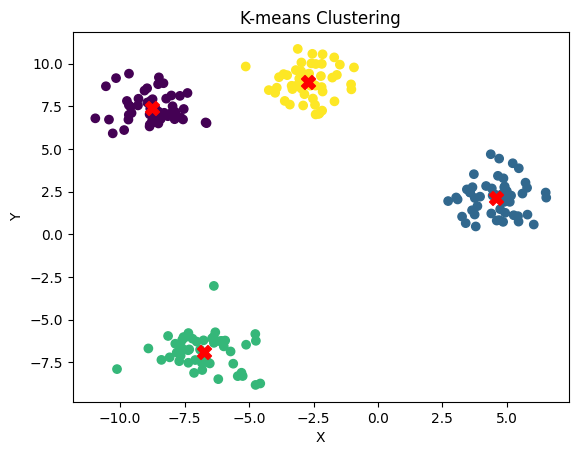

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation

import warnings
warnings.filterwarnings("ignore")

# Generate random data points
X, y = make_blobs(n_samples=200, centers=4, random_state=42)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Initialize figure and axis
fig, ax = plt.subplots()

# Scatter plot function
scat = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
centroid_plot = ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)

# Update function for animation
def update(i):
    # Perform K-means clustering
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Update scatter plot
    scat.set_offsets(X[:, :2])
    scat.set_array(labels)
    centroid_plot.set_offsets(centroids[:, :2])

# Create animation
ani = FuncAnimation(fig, update, frames=10, interval=1000, repeat=False)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-means Clustering")
plt.show()


## Hierarichal Clustering Intuition

Hierarchical clustering is a type of clustering algorithm that aims to create a hierarchy of clusters. The algorithm starts with each data point as an individual cluster and then merges clusters iteratively based on their similarity, until all data points belong to a single cluster. There are two main types of hierarchical clustering:

- 1. `Agglomerative Clustering (Bottom-up)`: In this approach, each data point starts as a separate cluster, and at each step, the two closest clusters are merged until a single cluster containing all data points is obtained.

- 2. `Divisive Clustering (Top-down)`: In this approach, all data points start in a single cluster, and at each step, the cluster is divided into two smaller clusters until each data point is in its own cluster.

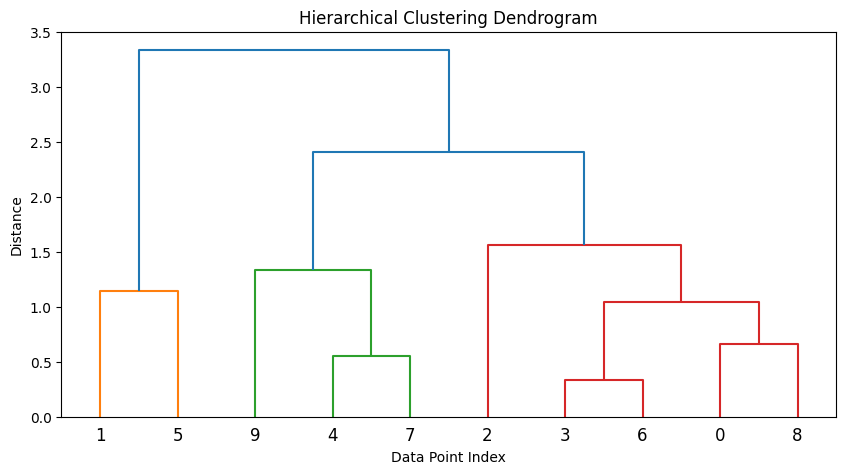

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random data points
np.random.seed(0)
X = np.random.randn(10, 2)

# Perform hierarchical clustering
Z = linkage(X, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()


## Mathematical Intution behind HierarchialCluatering

Hierarchical clustering aims to build a hierarchy of clusters by iteratively merging or splitting clusters based on their similarity or dissimilarity. The process involves constructing a dendrogram, which is a tree-like structure that represents the relationships between data points and clusters.

Let's consider agglomerative hierarchical clustering, which starts with each data point as an individual cluster and iteratively merges the closest clusters until a single cluster containing all data points is obtained. The steps involved in agglomerative hierarchical clustering are as follows:

1. Calculate the dissimilarity or distance between each pair of data points. Common distance metrics used include Euclidean distance, Manhattan distance, or cosine similarity.

2. Initially, each data point is treated as a separate cluster.

3. Compute the proximity matrix that represents the distance or dissimilarity between each pair of clusters. The proximity matrix is initially populated with the pairwise distances between individual data points.

4. Find the two closest clusters based on the chosen distance metric. This can be determined using a linkage criterion such as complete linkage (maximum distance), single linkage (minimum distance), or average linkage (average distance).

5. Merge the two closest clusters into a new cluster, updating the proximity matrix accordingly. The new cluster is represented as a parent node in the dendrogram, and the merged clusters are its child nodes.

6. Repeat steps 4 and 5 until all data points belong to a single cluster.

By examining the dendrogram, we can determine the optimal number of clusters by selecting a threshold on the vertical axis. The height at which the dendrogram is cut corresponds to the number of clusters.

The mathematical intuition behind divisive hierarchical clustering is similar but in reverse. It starts with all data points belonging to a single cluster and iteratively splits the cluster into smaller clusters until each data point is in its own cluster.

Hierarchical clustering provides a flexible approach to clustering as it allows for the exploration of different levels of granularity and can handle non-convex cluster shapes. However, it can be computationally expensive for large datasets.

## How to find threshold value in Both Kmeans and Hierarchical Clustering

In both K-means and hierarchical clustering, finding the appropriate threshold or determining the optimal number of clusters can be a challenge. Here are some approaches for finding the threshold value in both clustering algorithms:

- `Elbow Method`: For K-means clustering, you can use the elbow method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS measures the compactness of the clusters. The plot will typically exhibit a downward trend, but at some point, the rate of decrease slows down, forming an elbow-like shape. The number of clusters at this elbow point can be considered as the optimal number. However, it's important to note that this method may not always provide a clear elbow, and subjective judgment may still be required.

- `Silhouette Score` : The silhouette score is a measure of how well each data point fits its own cluster compared to other clusters. For K-means clustering, you can calculate the silhouette score for different values of k (number of clusters) and choose the value that maximizes the silhouette score. Higher silhouette scores indicate better-defined and well-separated clusters.

- `Dendrogram`: In hierarchical clustering, you can use the dendrogram to visualize the dissimilarity or distance between clusters at different levels. By cutting the dendrogram at various heights, you can obtain different numbers of clusters. You can observe the resulting clusters and choose a threshold that best separates the data points based on your domain knowledge or problem-specific criteria.

- `Gap Statistic`: The gap statistic is another method to determine the optimal number of clusters in K-means clustering. It compares the within-cluster dispersion to an expected dispersion under null reference distributions. The optimal number of clusters corresponds to the value that maximizes the gap statistic.

- `Silhouette Coefficient`: Similar to the silhouette score in K-means clustering, the silhouette coefficient can be used for hierarchical clustering as well. It measures the cohesion and separation of clusters and can help determine the appropriate number of clusters.

It's important to note that these methods provide guidance but may not always yield a definitive answer. The choice of the threshold or number of clusters may also depend on the specific problem, data characteristics, and domain knowledge. It's often helpful to apply a combination of methods and evaluate the results to make an informed decision.

## K-Means VS Hierarchical Clustering
- for smaller datasets use denogram but in Kmeans is used in larger datasets.
- Kmeans can used in numeical datasets but Hierarchial can handle both Numerical and categorical

`K-means` clustering and `hierarchical` clustering are two popular clustering algorithms, but they have some key differences in terms of their approach and the type of data they are suited for. Here's a comparison between K-means clustering and hierarchical clustering:

1. Approach:

- K-means: K-means is a centroid-based clustering algorithm. It aims to partition the data into K distinct clusters by minimizing the sum of squared distances between data points and their assigned cluster centroids.
- Hierarchical: Hierarchical clustering builds a hierarchy of clusters. It starts with each data point as an individual cluster and merges or splits clusters based on their similarity or dissimilarity.

2. Number of Clusters:

- K-means: The number of clusters (K) needs to be specified in advance.
- Hierarchical: The number of clusters is not required to be specified in advance. The hierarchy of clusters allows for exploring different levels of granularity.

3. Data Shape:

- K-means: K-means assumes that clusters are spherical and of equal size. It works well when the data is well-separated and the clusters have similar variances.
- Hierarchical: Hierarchical clustering can handle non-spherical and non-convex cluster shapes. It is more flexible and can capture complex relationships between data points.

3. Scalability:

- K-means: K-means is computationally efficient and can handle large datasets with a high number of data points.
- Hierarchical: Hierarchical clustering can be computationally expensive, especially for large datasets, as it needs to calculate pairwise distances between all data points.

4. Interpretability:

- K-means: K-means provides cluster centroids that can be easily interpreted and can be useful for data exploration and analysis.
- Hierarchical: Hierarchical clustering provides a visual representation of the cluster hierarchy through a dendrogram, which can provide insights into the relationships between clusters.

### When to use each algorithm:

- K-means clustering is suitable when the number of clusters is known or can be determined based on domain knowledge. It is efficient and works well for well-separated, spherical clusters of similar sizes. It is commonly used for image compression, customer segmentation, and data analysis tasks.
- Hierarchical clustering is useful when the number of clusters is unknown or when exploring different levels of granularity is important. It can handle non-spherical and non-convex clusters, making it suitable for analyzing complex relationships in the data. It is often used in biological taxonomy, market segmentation, and exploratory data analysis.

Ultimately, the choice between K-means clustering and hierarchical clustering depends on the specific characteristics of the data, the objectives of the analysis, and the desired level of interpretabil

## DB-SCAN Clustering

`DBSCAN (Density-Based Spatial Clustering of Applications with Noise)` is a density-based clustering algorithm that groups data points based on their density and proximity. The mathematical intuition behind DBSCAN involves defining the concept of density and identifying core points, border points, and noise points.

Here's a step-by-step explanation of the mathematical intuition behind DBSCAN:

- 1. `Density`: DBSCAN defines density as the number of data points within a specified distance (Eps) of a given data point. This distance is typically measured using a distance metric such as Euclidean distance.

- 2. `Core Points`: A core point is a data point that has a sufficient number of neighboring data points within the distance Eps. In other words, if the number of data points within Eps of a given point is greater than or equal to a predefined minimum number of points (MinPts), then that point is considered a core point.

- 3. `Border Points`: A border point is a data point that is within the distance Eps of a core point but does not have enough neighboring points to be considered a core point itself.

- 4. `Noise Points`: Noise points, also known as outliers, are data points that are neither core points nor border points.

- 5. `Cluster Formation`: DBSCAN starts by randomly selecting an unvisited data point and examines its neighborhood. If the point is a core point, a new cluster is created, and all reachable data points within the distance Eps are assigned to this cluster. The process is repeated for the newly added points until all reachable points have been visited. If a point is not a core point, it is labeled as noise. This process continues until all data points have been visited.

- 6. `Cluster Expansion` : Once the initial clusters are formed, DBSCAN iteratively expands each cluster by adding border points to the cluster. If a border point is added to a cluster, its neighborhood is explored, and any core or border points within Eps are also added to the cluster. This process continues until no more points can be added.

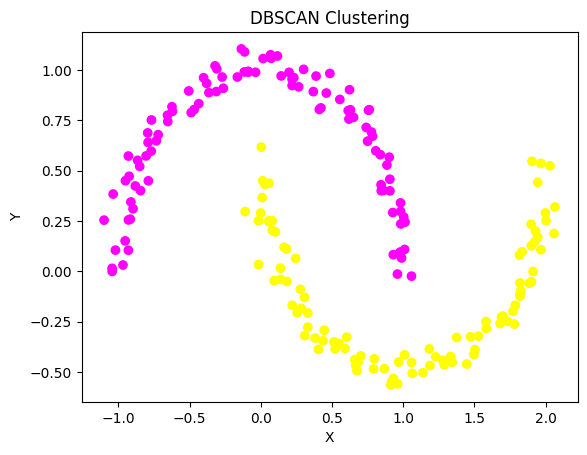

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='spring')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("DBSCAN Clustering")
plt.show()


## Core Points:

- `Definition`: Core points are data points within the dataset that have a sufficient number of neighboring data points within a specified distance (Eps).
- In the code: Core points are identified using the core_samples_mask, which is a boolean mask that indicates whether each data point is a core point or not. It is created using the core_sample_indices_ attribute of the DBSCAN object.

## Border Points:

- `Definition`: Border points are data points within the dataset that are within the specified distance (Eps) of a core point but do not have enough neighboring points to be considered core points themselves.
- In the code: Border points are identified using the border_samples_mask, which is a boolean mask that indicates whether each data point is a border point or not. It is created by checking if the corresponding label is not -1 (i.e., not noise) and is not a core point.

## Noise Points:

- `Definition`: Noise points, also known as outliers, are data points that are not within the specified distance (Eps) of any core point.
- In the code: Noise points are identified using the noise_samples_mask, which is a boolean mask that indicates whether each data point is a noise point or not. It is created by checking if the corresponding label is -1.

These definitions provide a clear understanding of the different types of points identified by DBSCAN clustering. The code uses these definitions to visualize the core points, border points, and noise points separately, helping to analyze and interpret the clustering results

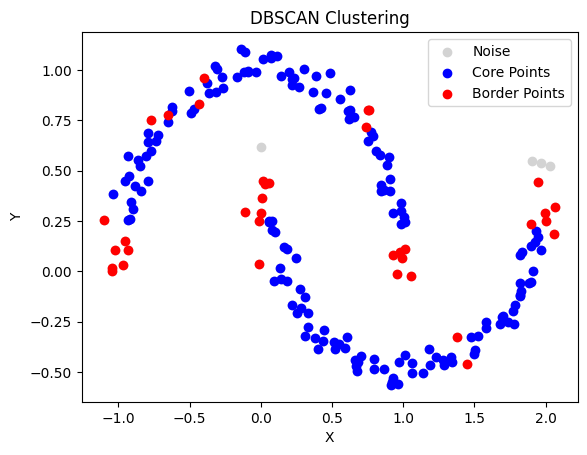

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=17)
dbscan.fit(X)
labels = dbscan.labels_

# Identify core points, border points, and noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
border_samples_mask = (labels != -1) & ~core_samples_mask
noise_samples_mask = (labels == -1)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c='lightgray', label='Noise')
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], c='blue', label='Core Points')
plt.scatter(X[border_samples_mask, 0], X[border_samples_mask, 1], c='red', label='Border Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


## Silhoutte Scoring And Clustering

Silhouette scoring is a metric used to evaluate the quality of clustering results. It measures how well each sample in a cluster fits with its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a higher score indicates better clustering quality. Here's an overview of silhouette scoring and its relationship with clustering:

1. Silhouette Coefficient:
 - The silhouette coefficient for a single sample measures its cohesion within its own cluster and separation from other clusters. It is calculated as follows:
    - For each sample, compute the average distance to other samples in the same cluster (a).
    - For each sample, compute the average distance to samples in the nearest neighboring cluster (b).
    - Calculate the silhouette coefficient for the sample as (b - a) / max(a, b).
  - The overall silhouette score for a clustering solution is the average of the silhouette coefficients for all samples.

2. Interpreting Silhouette Scores:

- A silhouette score close to +1 indicates that the samples are well-clustered, with good separation from other clusters.
- A silhouette score close to 0 suggests overlapping clusters or ambiguous cluster assignments.
- A silhouette score close to -1 indicates that samples may have been assigned to the wrong cluster.

3. Using Silhouette Scores for Clustering:

- Silhouette scores are useful for comparing different clustering algorithms or different parameter settings within the same algorithm.
- Higher silhouette scores indicate better-defined and more separated clusters.
- Silhouette scores can guide the selection of the optimal number of clusters. The number of clusters that maximizes the average silhouette score is often considered a good choice.

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, random_state=42)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.8469881221532085
